In [4]:
from parse import parse
import poq_token
from class_hierarchy import plot_subclasses_graph

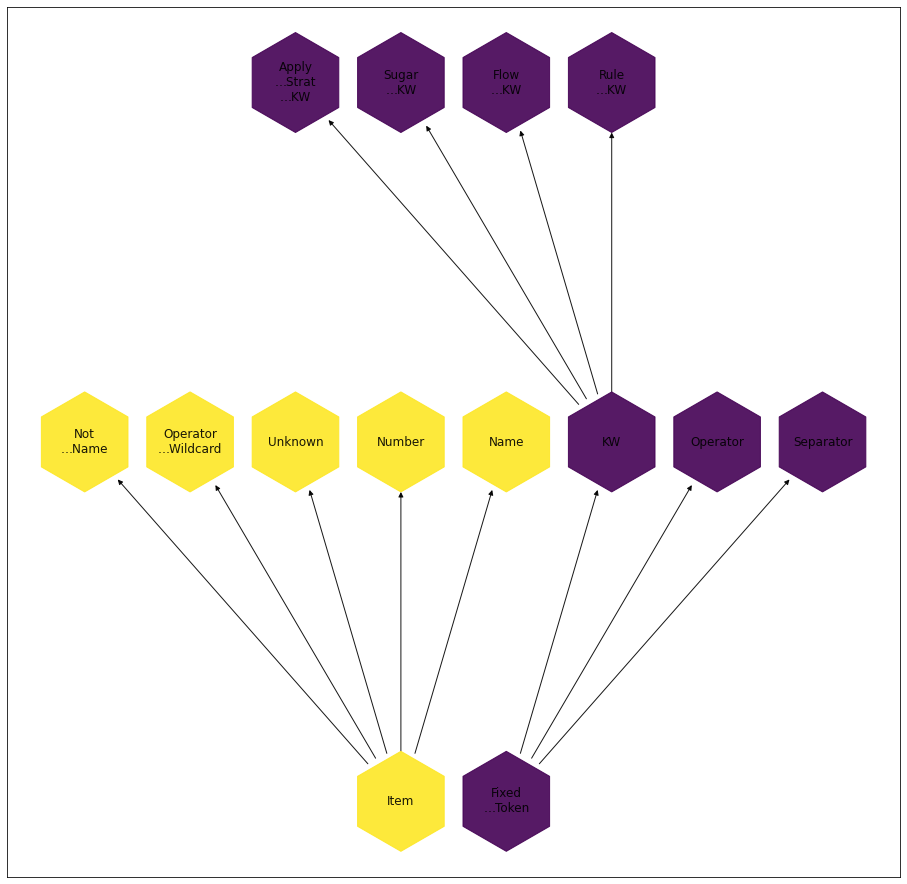

In [5]:
plot_subclasses_graph(
    [
        (poq_token.FixedToken, 0), 
        (poq_token.Item, 0),
    ],
    16, 
    1e4
    )

In [6]:


recipe = '''
sqos = shape {
    (a + b)^2 
    => 
        sum = sub {(a+b) => x}
        square_id = shape { a^2 => a*a }
        mul_of_sum = shape {x * (y + z) => x*y + x*z}
        mul_commut = shape {self * other => other * self}
        apply square_id to all 
            with sum to all
            expand
        apply mul_of_sum to all 
            with sum to first
            expand
        apply mul_commut to all 
            with sum to all
            expand
        apply mul_of_sum to all
        apply reverse square_id to all
        apply mul_commut to first
        apply shape {x + x => 2*x} to all with {all b*a =>g}
        expand
}

shape {
    ((z + y)^2 + y)^2
    =>
        apply sqos to all with 
        { 
            all (z + y)^2 => a
        }
        expand
        apply sqos to all
}
'''

parse(recipe)


'((f(x) + y)^2 + y)^2 = (((f(x) + y)^2)^2) + 2*(y*((f(x) + y)^2)) + (y^2)'


An example of why i deem it impossible to choose matches with an index and not feel pain.

what to match first with `head_expr` <=> `expr`? whole `head` to `expr` or `head_token` to `expr`?

matching expr to expr token by token first

`(a + b) + c`     =>    a + 2(3b + 4c)    <=>     `((a + b) + x) + d`   try

`(a + b)` + c     =>    a + 2(3b + 4c)    <=>     `((a + b) + x)` + d   try

(`a` + b) + c     =>    a + 2(3b + 4c)    <=>     (`(a + b)` + x) + d   try

(a `+ b`) + c     =>    a + 2(3b + 4c)    <=>     ((a + b) `+ x`) + d   try

`(a + b)` + c     =>    a + 2(3b + 4c)    <=>     `((a + b) + x)` + d   match

(a + b) `+ c`     =>    a + 2(3b + 4c)    <=>     ((a + b) + x) `+ d`   match


answer is `(a+b) + 2(3x + 4d)`





matching expr to expr by matching whole head to expr first

`(a + b) + c`     =>    a + 2(3b + 4c)    <=>     `((a + b) + x) + d`   try

  (a + b) + c     =>    a + 2(3b + 4c)    <=>     `((a + b) + x)` + d   try

`(a + b) + c`     =>    a + 2(3b + 4c)    <=>     (`(a + b) + x`) + d   try

  (a + b) + c     =>    a + 2(3b + 4c)    <=>     (`(a + b)` + x) + d   try

`(a + b) + c`     =>    a + 2(3b + 4c)    <=>     ((`a + b`) + x) + d   no match

return 

`(a + b)` + c     =>    a + 2(3b + 4c)    <=>     (`(a + b)` + x) + d   try

...

`(a + b) + c`     =>    a + 2(3b + 4c)    <=>     (`(a + b) + x`) + d   match

answer is `(a + 2(3b + 4x)) + d`
